In [1]:
import sys 
sys.path.append('..')

import numpy as np
import pandas as pd

from ModelTools.regression.linear_model import LinearModel

In [2]:
twsl = pd.read_csv('../data/twsl.csv').loc[lambda dt:(dt.E<15000) & (dt.E>100)]
twsl

,ts,TcwIn,TcwOut,Fcw,E,Tdb,RH,Twb,Q
0,2022/4/1 0:00,14.012282,11.022925,4906.207305,3630,14.285291,83.424967,12.661207,17057.02900
1,2022/4/1 1:00,13.870964,11.145850,5379.495977,3679,14.085406,83.145212,12.443063,17049.28122
2,2022/4/1 2:00,13.684488,11.025519,5487.995352,3678,14.188088,82.804821,12.506202,16970.97568
3,2022/4/1 3:00,13.608737,10.965467,5486.368394,3678,14.182449,82.262291,12.446364,16865.76929
4,2022/4/1 4:00,13.682576,10.993256,5451.207432,3669,14.389554,81.573418,12.572128,17049.63091
...,...,...,...,...,...,...,...,...,...
6102,2022/12/30 19:00,14.781033,10.307717,4055.899424,4665,8.232744,88.404755,7.313520,21100.68290
6103,2022/12/30 20:00,14.614902,10.102821,3989.814937,4616,8.399331,87.748222,7.420839,20936.75481
6104,2022/12/30 21:00,14.496156,9.776719,3840.086040,4617,8.301522,89.326485,7.453849,21077.10288
6105,2022/12/30 22:00,14.294255,9.507426,3765.697339,4575,8.381511,88.720081,7.482467,20963.94992


In [3]:
mod1 = LinearModel('E~Q+Twb+Q:Twb+Q:I(Twb**2)',data=twsl).fit(method='OLS')
mod1.summary()

                     estimate      std_Error          z    p_value         ci_lower         ci_upper
-------------  --------------  -------------  ---------  ---------  ---------------  ---------------
Intercept      -1366.14        142.205         -9.60684          0  -1657.76         -1100.31
Q                  0.307741      0.00888079    34.6524           0      0.291465         0.325738
Twb               65.8337        6.59756        9.97849          0     53.13            78.996
Q:Twb             -0.00899983    0.000579022  -15.5432           0     -0.0101491       -0.00793961
Q:I(Twb ** 2)      0.00024495    1.03457e-05   23.6765           0      0.000226104      0.000265887
                    R2         MSE        MAE           MBE       MdAE         MAPE      MaxE        SAE        SAPE
---------  -----------  ----------  ---------  ------------  ---------  -----------  --------  ---------  ----------
estimate   0.953358     432256      319.51       1.3839e-10  195.846    0.05

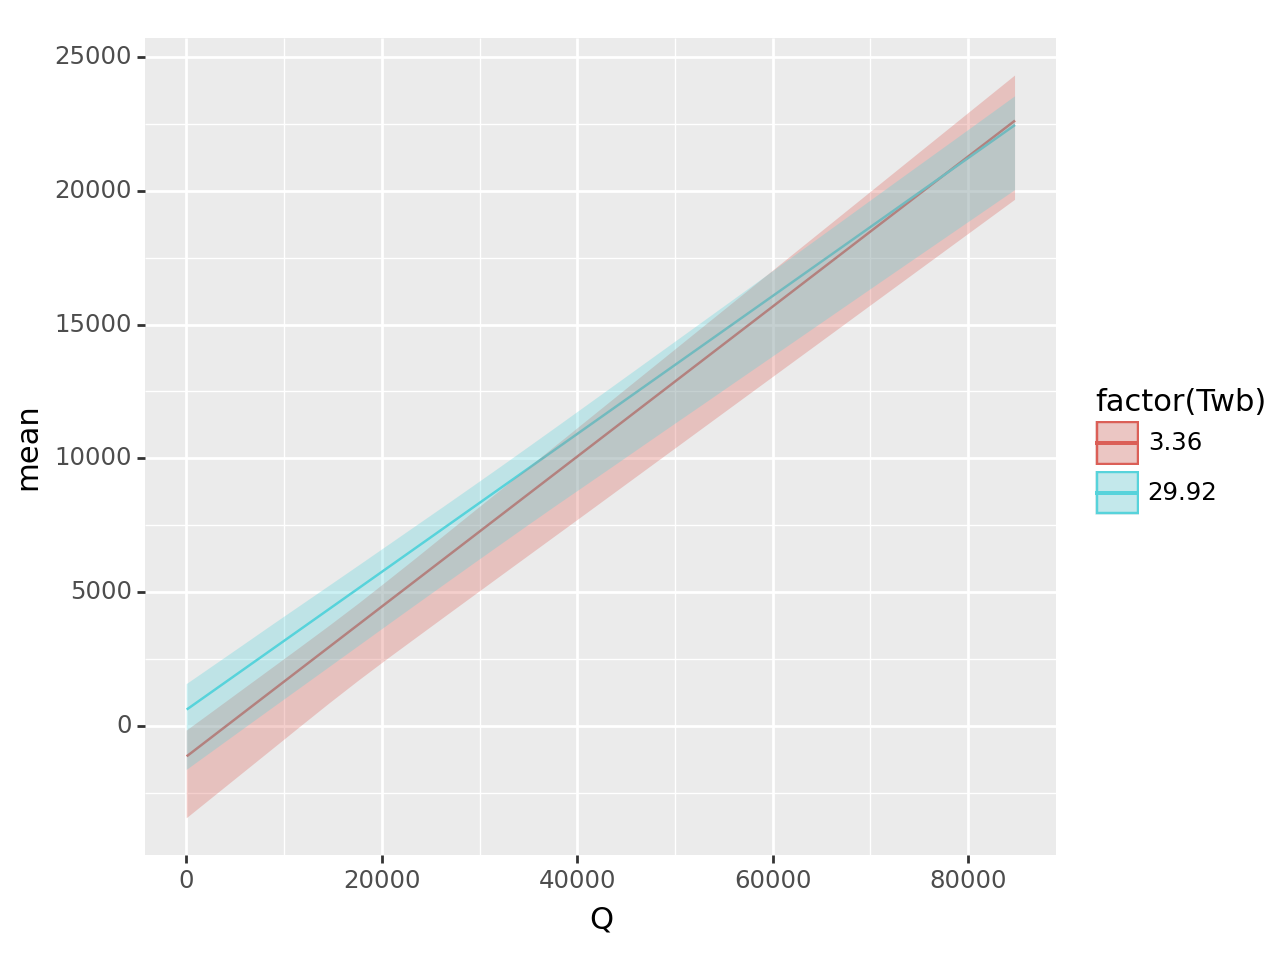

<Figure Size: (640 x 480)>

In [4]:
mod1.plot_prediction(data_grid = {'Q':'line','Twb':'minmax'},ci_type='obs')

In [5]:
mod2 = LinearModel('E~Q+Twb+Q:Twb+Q:I(Twb**2)',data=twsl).fit(method='HUBER')
mod2.summary()

                   estimate    std_Error         z    p_value      ci_lower      ci_upper
-------------  ------------  -----------  --------  ---------  ------------  ------------
Intercept       2.13147e-05  4.23929e-07   50.2788          0   2.05307e-05   2.21723e-05
Q               0.220156     0.000939968  234.217           0   0.21828       0.222191
Twb             0.000176775  1.02256e-05   17.2875          0   0.00015794    0.000199174
Q:Twb          -0.00196196   0.00011995   -16.3564          0  -0.00223202   -0.00172418
Q:I(Twb ** 2)   0.000116063  3.60122e-06   32.2288          0   0.000108873   0.000123618
                   R2         MSE          MAE       MBE        MdAE         MAPE        MaxE         SAE         SAPE
---------  ----------  ----------  -----------  --------  ----------  -----------  ----------  ----------  -----------
estimate   0.951579    448745      308.654      77.8614   178.959     0.0560053    11700.5     594.54      0.123237
std_error  9.0307e-0

In [ ]:
mod2.plot_check()

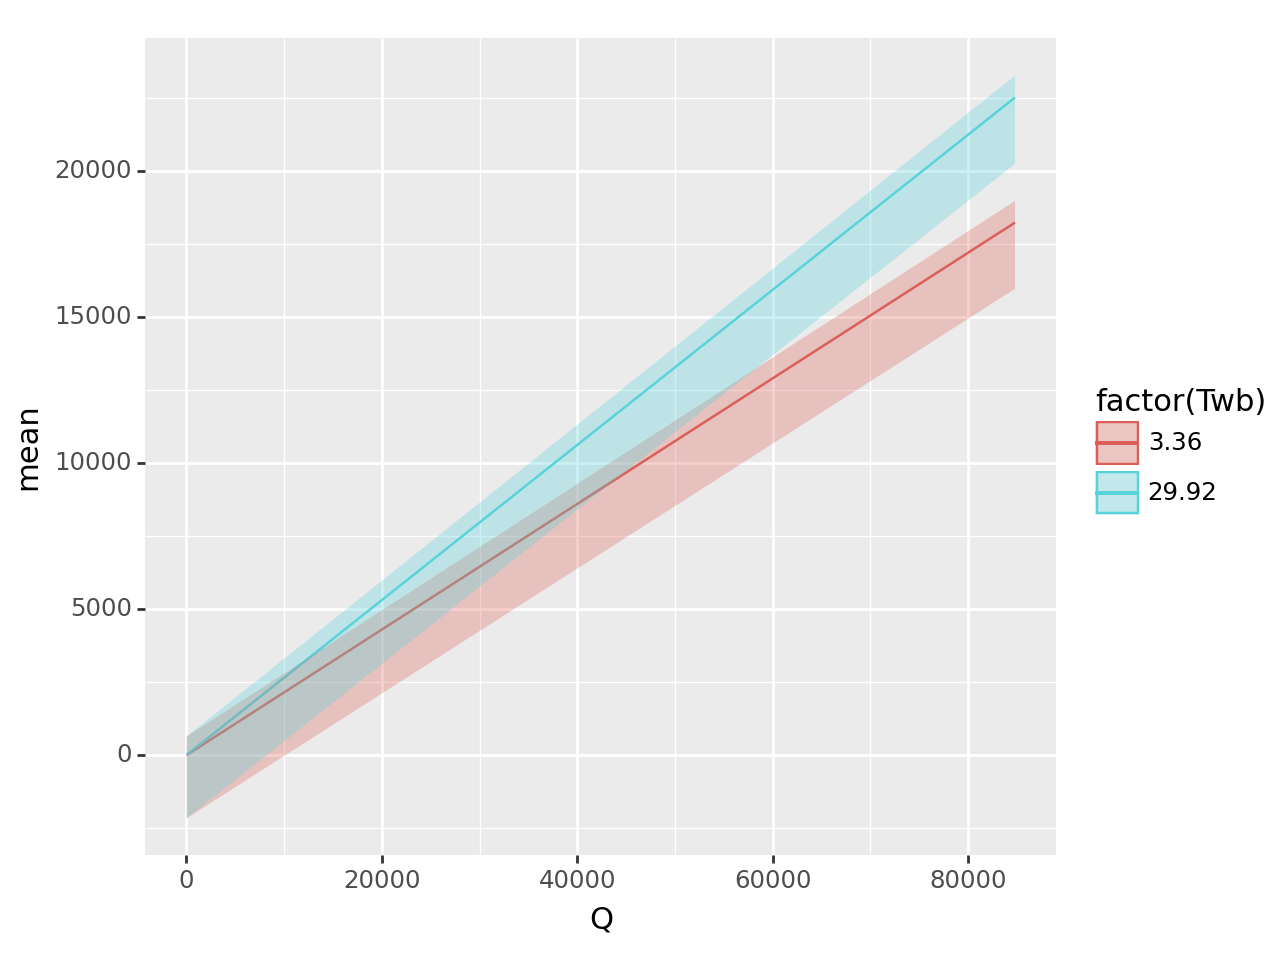

<Figure Size: (640 x 480)>

In [6]:
mod2.plot_prediction(data_grid = {'Q':'line','Twb':'minmax'},ci_type='obs')

In [ ]:
mod2.plot_prediction(data_grid = {'Twb':'line','Q':'meansd'},ci_type='obs')